<a href="https://colab.research.google.com/github/ANSHAY/deeplearning/blob/master/main_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poetry Generator

## Import Libraries

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Define Parameters

In [0]:
filepath = "/romio_juliet.txt"
save_file_path = '/romio_juliet_predicted.txt'
PADDING = 'pre'
TRUNC = 'pre'

VOCAB_SIZE = 10000
EMB_DIM = 128

OPTIMIZER = 'adam'
LOSS = 'categorical_crossentropy'
METRICS = ['acc']
EPOCHS = 500
BATCH_SIZE = 128
VAL_SPLIT = 0.1

SEEDER = 'That shows thee'    ## Seeder word to start prediction of poetry
NUM_PREDICTIONS = 5000

model_name = filepath[:-4] + "_model.h5"

data = "This is some random statement \n being used as placeholder for the actual data that is to be \n imported later from a file."

## Load Data

In [3]:
with open(filepath) as f:
    data = f.read()
    f.close()
data = data.replace('\n', ' \n<>')
sentences = data.lower().split('<>')
print(len(sentences))
print(sentences[1])
print(len(sentences[1]))

4316
prologue 

10


## Tokenize Data

In [4]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
total_words = len(word_index) + 1
print(total_words)
print(word_index['\n'])

3765
1


In [5]:
## create reverse_word_index
reverse_word_index = {}
for word, i in word_index.items():
    reverse_word_index[i] = word
print(reverse_word_index[1])

## Change Sentences to Sequences

In [6]:
sequences = tokenizer.texts_to_sequences(sentences)
new_seq = []
for row in sequences:
    for i in range(2, len(row)+1):
        new_seq.append(row[:i])
padded_seq = pad_sequences(new_seq, padding=PADDING, truncating=TRUNC)
print(padded_seq[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 454   4]


## Extract trainX and trainY from sequences

In [7]:
trainX = padded_seq[:,:-1]
trainY = padded_seq[:,-1]
trainY = tf.keras.utils.to_categorical(trainY, num_classes=total_words)

INP_LEN = trainX.shape[1]
OUT_LEN = trainY.shape[1]

print(trainX.shape)
print(trainY.shape)

(25919, 16)
(25919, 3765)


## Define Callback

In [0]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, log={}):
        if (log.get('acc')>0.90):
            self.model.stop_training = True
            print("\n Stopped training since model reached accuracy of 90%")
callback = myCallback()

## Define Model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(total_words, EMB_DIM, input_length=INP_LEN),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

W0716 11:35:11.017094 139690874800000 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0716 11:35:11.023859 139690874800000 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0716 11:35:11.035347 139690874800000 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init

In [10]:
model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 128)           481920    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 3765)              244725    
Total params: 767,861
Trainable params: 767,861
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [11]:
history = model.fit(trainX, trainY, validation_split=VAL_SPLIT, verbose=1, epochs = EPOCHS, batch_size=BATCH_SIZE, callbacks=[callback])

Train on 23327 samples, validate on 2592 samples


W0716 11:35:33.872770 139690874800000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
23327/23327 [==============================] - 18s 774us/sample - loss: 6.5112 - acc: 0.1573 - val_loss: 6.0362 - val_acc: 0.1562
Epoch 2/500
23327/23327 [==============================] - 16s 694us/sample - loss: 5.8320 - acc: 0.1606 - val_loss: 6.0091 - val_acc: 0.1562
Epoch 3/500
23327/23327 [==============================] - 16s 694us/sample - loss: 5.7403 - acc: 0.1602 - val_loss: 6.0333 - val_acc: 0.1551
Epoch 4/500
23327/23327 [==============================] - 16s 695us/sample - loss: 5.6778 - acc: 0.1579 - val_loss: 6.0663 - val_acc: 0.1493
Epoch 5/500
23327/23327 [==============================] - 16s 688us/sample - loss: 5.6276 - acc: 0.1588 - val_loss: 6.0678 - val_acc: 0.1535
Epoch 6/500
23327/23327 [==============================] - 16s 694us/sample - loss: 5.5876 - acc: 0.1607 - val_loss: 6.0805 - val_acc: 0.1570
Epoch 7/500
23327/23327 [==============================] - 16s 691us/sample - loss: 5.5522 - acc: 0.1638 - val_loss: 6.0811 - val_acc: 0.1570
Epoch 

## Save Model

In [0]:
model.save(model_name)

## Plot Results

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matp

<Figure size 432x288 with 0 Axes>

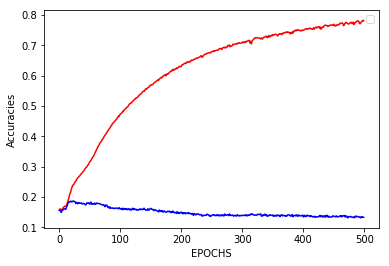

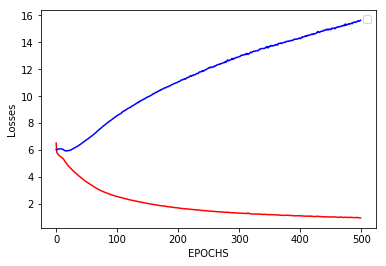

<Figure size 432x288 with 0 Axes>

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(EPOCHS)

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracies')
plt.legend('Train Acc', 'Val Acc')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('EPOCHS')
plt.ylabel('Losses')
plt.legend('Train Loss', 'Val Loss')
plt.figure()

## Generate Poetry by iterating over the predictor from the model

In [16]:
sentence = SEEDER.lower()
corpus = SEEDER.lower()
new_line = False
print (sentence, end=' ')
for i in range(NUM_PREDICTIONS):
    seq = tokenizer.texts_to_sequences([sentence])
    seq = pad_sequences(seq, padding=PADDING, truncating=TRUNC, maxlen=INP_LEN)
    new_word = model.predict_classes(seq)
    new_word = reverse_word_index[new_word[0]]
    if new_line:
        corpus += new_word
        new_line = False
    else:
        corpus += ' ' + new_word
    
    if new_word=='\n':
        sentence = reverse_word_index[random.randint(1, total_words)]
        #sentence = reverse_word_index[seq[0][-1]]
        new_line = True
        print (new_word, end='')
    else:
        sentence += ' ' + new_word
        print (new_word, end=' ')


that shows thee a weak slave for the weakest goes 
till this same which dark earth there 
soul for you do not move me 
most wicked under 
by my soul i'll know the well if well 
all the kindred of the goose if dark 
gentleman the bitter sweeting it is broad capulet 
i thank nimble pinion'd doves draw love 
eyes hath well 
mercutio and benvolio 
not reply not can do but 'love' and breath 
' o then i hope thou wilt be merry 
i am fortune's fool 
for coughing in the street because he hath 
by my soul is mine at leisure earth back 
gentleman 
not so hot 
a visor for a visor what rat as years verona 
heart within tell them back them better dead why why why 
thou mayst think tybalt murdered 

sir i would adventure for such vile piece 
her fetch a ladder by myself 
for a man shall be in night i have 
makes the world to know there's 
night 
to clouds more clouds with his deep sighs 
page whom i said my flower 
in their own beauties or if love be bride 
in gore beauty is my convoy 
for the devou

## Save Poetry in a file

In [0]:
try:
    with open(save_file_path, 'w') as f:
        f.write(corpus)
        f.close()
except:
    print("\nWrite was Unsuccessful")